In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
fruits_data = pd.read_table("../DataFiles/fruit_data_with_colors.txt")
fruits_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
fruits_data.shape

(59, 7)

In [7]:
fruits_name_lookup = dict(zip(fruits_data.fruit_label.unique(),fruits_data.fruit_name.unique()))
fruits_name_lookup

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [26]:
X = fruits_data[['mass','width','height','color_score']]
y = fruits_data['fruit_label']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
X.shape,y.shape,X_train.shape,y_train.shape

((59, 4), (59,), (44, 4), (44,))

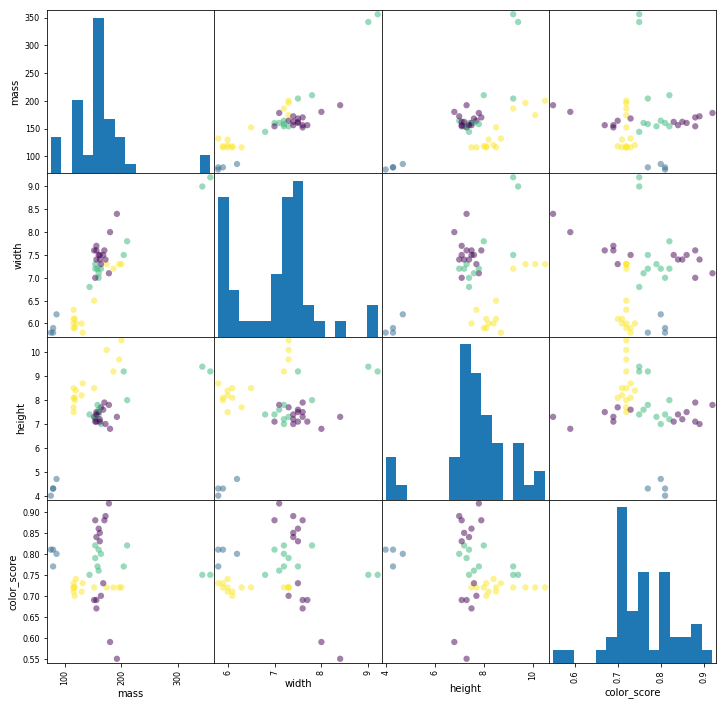

In [29]:
from pandas.plotting import scatter_matrix
# from matplotlib import cm
# cmap = cm.get_cmap('gnuplot')
# scatter = scatter_matrix(X_train,c=y_train, marker='o', s=40, hist_kwds={'bins':15}, figsize=(12,12), cmap=cmap)
scatter = scatter_matrix(X_train,c=y_train, marker='o', s=40, hist_kwds={'bins':15}, figsize=(12,12))
plt.show()